In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0) 

svc = SVC(gamma='auto') 
svc.fit(X_train, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on Training set: 1.000
Accuracy on Test set: 0.629


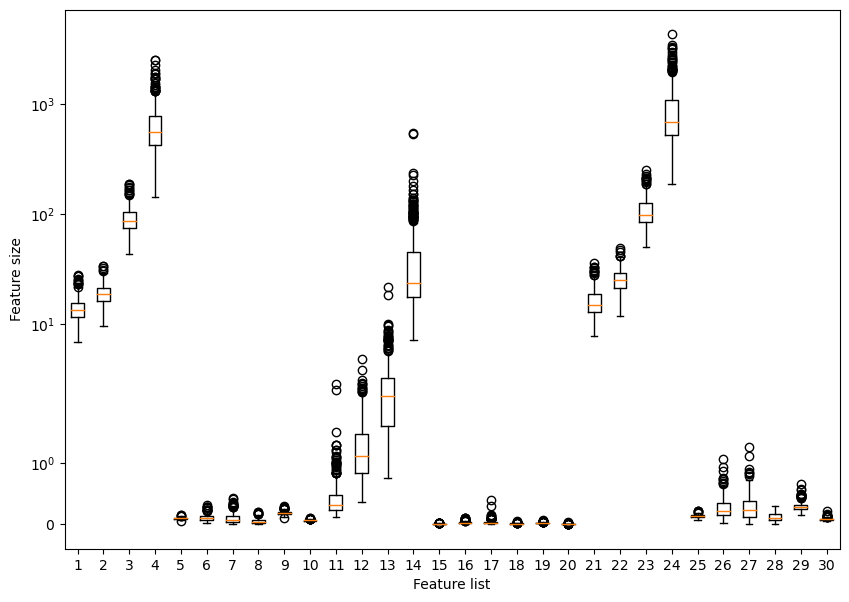

In [3]:
plt.figure(figsize=(10,7))
plt.boxplot(X_train)

plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")
plt.show()

In [5]:
min_on_training = X_train.min(axis=0) # 열마다의 최소값 계산
range_on_training = (X_train - min_on_training).max(axis=0) # 분모에 해당 
X_train_scaled = (X_train - min_on_training) / range_on_training # Min-max scaling (0~1)

In [7]:
sc = StandardScaler()
sc.fit(X_train) # X_train 의 평균과 표준편차를 구함

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

df = pd.DataFrame(X_train_scaled)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-3.356731e-15,-1.092501e-15,4.161512e-15,-1.530336e-15,-2.196991e-15,-3.502675e-16,1.200917e-15,4.336646e-16,-4.073945e-15,-2.017166e-15,...,-1.084161e-16,-5.003822e-17,-1.205087e-15,-4.169852e-17,4.428383e-15,-1.105011e-15,-5.045521e-16,1.250956e-17,-2.434151e-15,2.712489e-15
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.023041e+00,-2.312656e+00,-1.981021e+00,-1.430312e+00,-3.160432e+00,-1.665026e+00,-1.130378e+00,-1.267483e+00,-2.692455e+00,-1.849288e+00,...,-1.715425e+00,-2.248101e+00,-1.681616e+00,-1.199403e+00,-2.677913e+00,-1.486588e+00,-1.360156e+00,-1.758873e+00,-2.106216e+00,-1.603450e+00
25%,-6.881418e-01,-7.438490e-01,-6.832187e-01,-6.592052e-01,-7.031765e-01,-7.358151e-01,-7.467001e-01,-7.333480e-01,-6.859458e-01,-7.235262e-01,...,-6.661438e-01,-7.091121e-01,-6.806635e-01,-6.331662e-01,-7.282053e-01,-6.890046e-01,-7.689892e-01,-7.662973e-01,-6.580365e-01,-6.876632e-01
50%,-2.210048e-01,-1.027265e-01,-2.398295e-01,-2.939292e-01,-2.969849e-02,-1.903184e-01,-3.438961e-01,-3.965152e-01,-6.049317e-02,-1.434774e-01,...,-2.764983e-01,-6.817629e-02,-2.910562e-01,-3.467820e-01,-1.106401e-02,-2.427903e-01,-1.990212e-01,-2.505942e-01,-1.352366e-01,-2.031163e-01
75%,4.483469e-01,5.723950e-01,4.765171e-01,3.148873e-01,6.528122e-01,5.028367e-01,4.899554e-01,6.674355e-01,5.360367e-01,4.584876e-01,...,5.498364e-01,6.226972e-01,5.398901e-01,3.403863e-01,5.816418e-01,5.725231e-01,5.529024e-01,7.033039e-01,4.595372e-01,4.556986e-01
max,3.931794e+00,3.540015e+00,3.947633e+00,5.118266e+00,3.492692e+00,4.103431e+00,4.311748e+00,3.921702e+00,4.465904e+00,5.087920e+00,...,4.034146e+00,3.945823e+00,4.236997e+00,5.747920e+00,3.933759e+00,5.306877e+00,4.959081e+00,2.670375e+00,5.918486e+00,6.974084e+00


In [8]:
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on Training set: 0.986
Accuracy on Test set: 0.965


In [11]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best parameters are  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [13]:
grid_predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, grid_predictions))

print("Accuracy on Training set: {:.3f}".format(grid.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy on Training set: 0.986
Accuracy on Test set: 0.979
